#LSTM and ARIMA with CCI (Commodity Channel Index) Technical Indicator

**Authors:** Gabriel Sposito and Thomas Frentzel

**LSTM**


In [ ]:
!pip install ta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from ta.trend import CCIIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import PSARIndicator

In [ ]:
base = pd.read_csv('Intel 5Y.csv')
base.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$23.32,58650460,$22.25,$23.42,$22.045
1,10/07/2024,$22.38,54928670,$22.40,$22.65,$22.0209
2,10/04/2024,$22.59,49966930,$22.70,$22.91,$22.30
3,10/03/2024,$22.26,49565930,$22.14,$22.73,$21.65
4,10/02/2024,$22.39,59033900,$22.67,$23.0668,$22.35


In [ ]:
#Removing nule results
base.dropna()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$23.32,58650460,$22.25,$23.42,$22.045
1,10/07/2024,$22.38,54928670,$22.40,$22.65,$22.0209
2,10/04/2024,$22.59,49966930,$22.70,$22.91,$22.30
3,10/03/2024,$22.26,49565930,$22.14,$22.73,$21.65
4,10/02/2024,$22.39,59033900,$22.67,$23.0668,$22.35
...,...,...,...,...,...,...
1253,10/15/2019,$52.65,18970760,$51.93,$53.07,$51.83
1254,10/14/2019,$51.64,16425530,$51.90,$51.95,$51.44
1255,10/11/2019,$52.09,24167110,$52.00,$52.79,$51.82
1256,10/10/2019,$51.11,14611660,$50.41,$51.775,$50.40


In [ ]:
# Removing $
base['Close/Last'] = base['Close/Last'].str.replace('$', '')
base['Open'] = base['Open'].str.replace('$', '')
base['High'] = base['High'].str.replace('$', '')
base['Low'] = base['Low'].str.replace('$', '')

# Converting str to float
base['Close/Last'] = base['Close/Last'].astype(float)
base['Open'] = base['Open'].astype(float)
base['High'] = base['High'].astype(float)
base['Low'] = base['Low'].astype(float)

In [ ]:
cci = CCIIndicator(high=base['High'], low=base['Low'], close=base['Close/Last'], window=20, constant=0.015)
base['CCI'] = cci.cci()

sma_tp = base['High'] + base['Low'] + base['Close/Last'] / 3
sma_tp = sma_tp.rolling(window=20).mean()
mean_deviation = np.mean(np.abs(base['Close/Last'] - sma_tp))

rsi = RSIIndicator(close=base['Close/Last'], window=14)
base['RSI'] = rsi.rsi()

macd = MACD(close=base['Close/Last'], window_slow=26, window_fast=12, window_sign=9)
base['MACD'] = macd.macd()
base['MACD_Signal'] = macd.macd_signal()
base['MACD_Diff'] = macd.macd_diff()

psar = PSARIndicator(high=base['High'], low=base['Low'], close=base['Close/Last'])
base['Parabolic_SAR'] = psar.psar()

bollinger = BollingerBands(close=base['Close/Last'], window=20, window_dev=2)
base['Bollinger_High'] = bollinger.bollinger_hband()
base['Bollinger_Low'] = bollinger.bollinger_lband()
base['Bollinger_Middle'] = bollinger.bollinger_mavg()
base['Bollinger_Width'] = bollinger.bollinger_wband()

base.dropna()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,21.41,57028870,21.072,21.440,21.0700,109.236141,54.112274,-0.365474,-0.606827,0.241353,19.455067,21.792245,18.378755,20.08550,16.994799
34,08/20/2024,20.99,84161270,21.210,21.230,20.8200,82.525909,51.262625,-0.290474,-0.543556,0.253082,19.561664,21.823466,18.369534,20.09650,17.186732
35,08/19/2024,21.52,65956300,20.885,21.860,20.8350,124.006703,54.517618,-0.186125,-0.472070,0.285945,19.663997,21.834038,18.363962,20.09900,17.264916
36,08/16/2024,20.87,48582660,20.530,20.895,20.4101,57.383431,50.098507,-0.154100,-0.408476,0.254376,19.762238,21.828382,18.365618,20.09700,17.230254
37,08/15/2024,20.69,84814880,20.320,21.060,20.2300,46.431701,48.916029,-0.141612,-0.355103,0.213491,19.856548,21.886088,18.410912,20.14850,17.247812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,10/15/2019,52.65,18970760,51.930,53.070,51.8300,-68.893127,32.656899,-1.587661,-1.307755,-0.279905,53.235976,60.363386,49.940114,55.15175,18.899260
1254,10/14/2019,51.64,16425530,51.900,51.950,51.4400,-81.645295,28.543524,-1.611303,-1.368465,-0.242838,53.070000,60.025053,49.607447,54.81625,19.004594
1255,10/11/2019,52.09,24167110,52.000,52.790,51.8200,-59.811562,32.615978,-1.575567,-1.409885,-0.165681,51.029100,59.591590,49.422910,54.50725,18.655647
1256,10/10/2019,51.11,14611660,50.410,51.775,50.4000,-83.377075,28.770423,-1.607790,-1.449466,-0.158323,52.790000,59.176915,49.143585,54.16025,18.525264


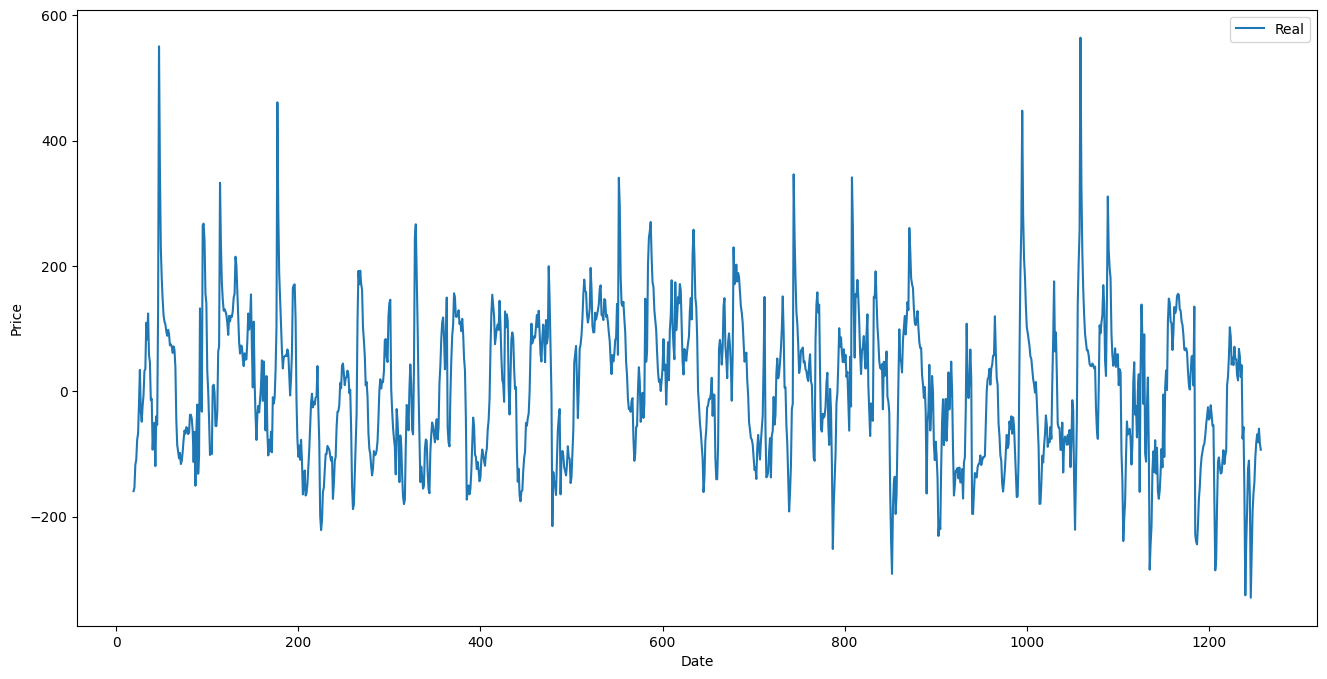

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base['CCI'], label='Real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

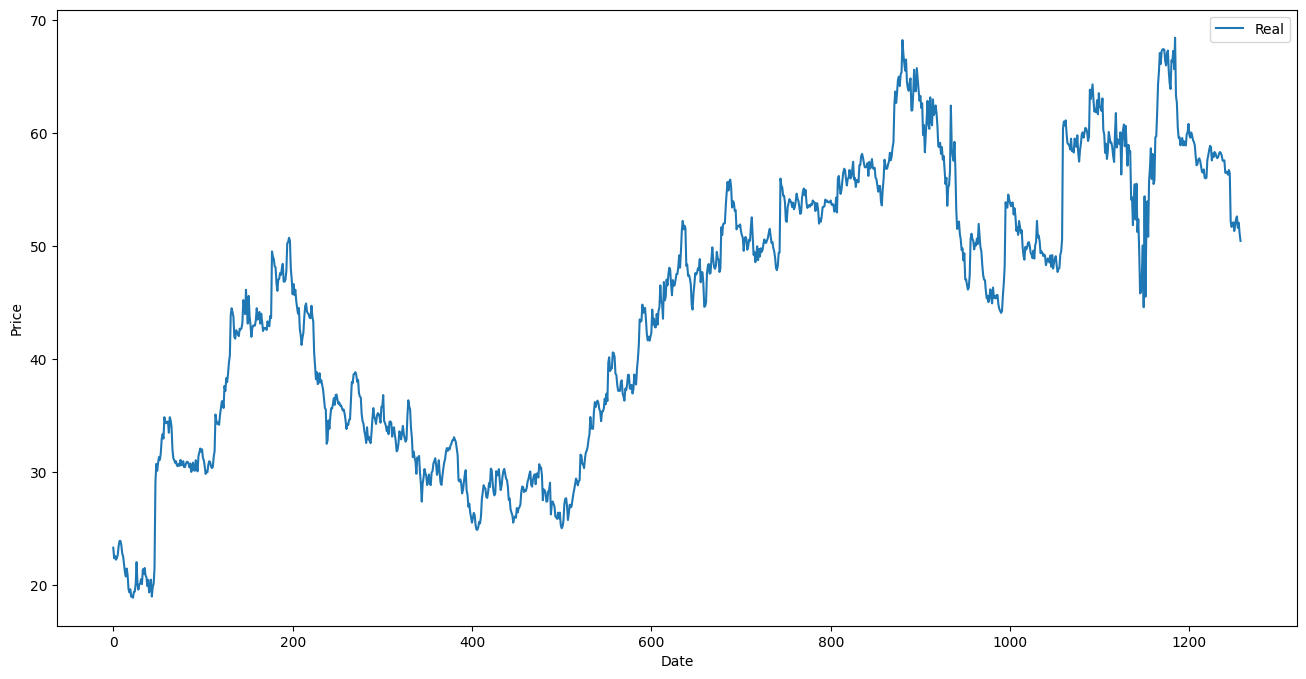

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base['Close/Last'], label='Real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [ ]:
# Converting indicator values ​​to numeric values ​​and removing NaN values
base = base.replace([np.inf, -np.inf], np.nan)
base = base.dropna()

In [ ]:
# Normalizing the data of real values
scaler_real_value = MinMaxScaler(feature_range=(0, 1))
scaled_data_real_value = scaler_real_value.fit_transform(np.array(base['Close/Last']).reshape(-1, 1))

In [ ]:
window_size_real_value = 10
forecasters_real_value = []
real_value_of_prices = []
for i in range(window_size_real_value, len(base)):
    forecasters_real_value.append(scaled_data_real_value[i - window_size_real_value:i, 0])
    real_value_of_prices.append(scaled_data_real_value[i, 0])

forecasters_real_value, real_value_of_prices = np.array(forecasters_real_value), np.array(real_value_of_prices)
forecasters_real_value = np.reshape(forecasters_real_value, (forecasters_real_value.shape[0], forecasters_real_value.shape[1], 1))

In [ ]:
#dividindo a coluna close/last em 70% treino e 30% teste com trai_test_split
Xtrain_real_lstm, Xtest_real_lstm, ytrain_real_lstm, ytest_real_lstm = train_test_split(forecasters_real_value, real_value_of_prices,
                                                                                        test_size = 0.3, shuffle = False)

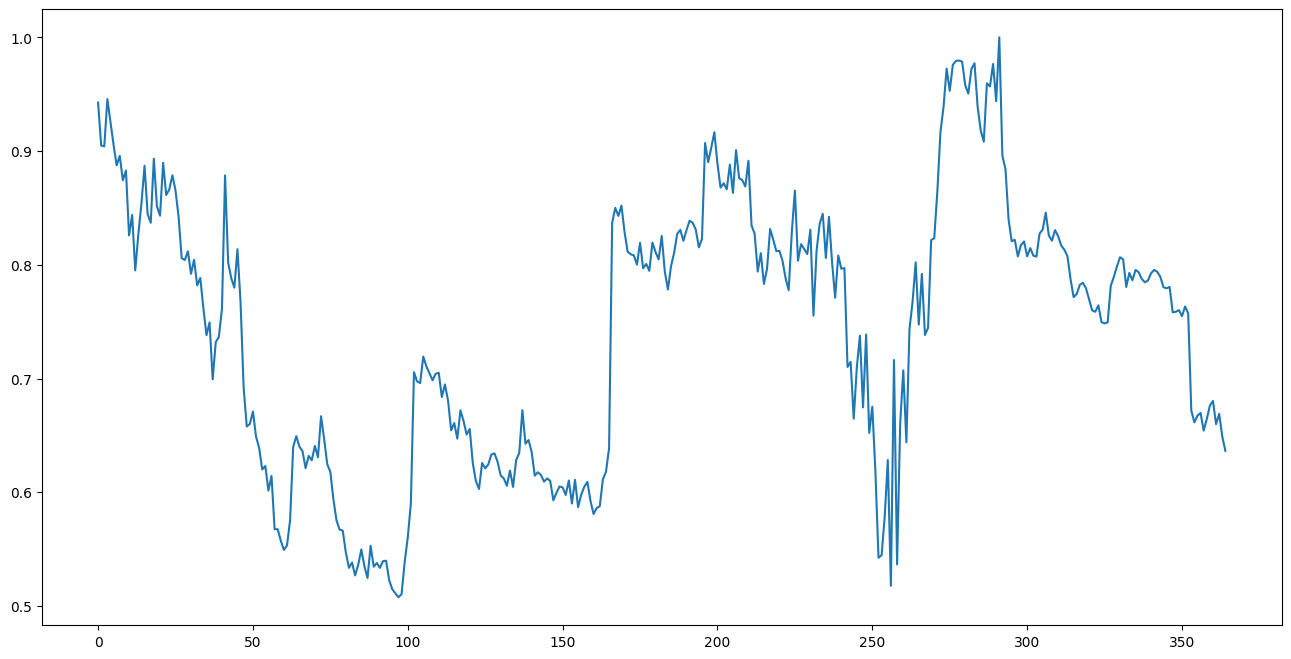

In [ ]:
#plotando grafico dos valores de teste
plt.figure(figsize=(16,8))
plt.plot(ytest_real_lstm)
plt.show()

In [ ]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(base['CCI']).reshape(-1, 1))

In [ ]:
window_size = 10
forecasters = []
real_value = []
for i in range(window_size, len(base)):
    forecasters.append(scaled_data[i - window_size:i, 0])
    real_value.append(scaled_data[i, 0])

forecasters, real_value = np.array(forecasters), np.array(real_value)
forecasters = np.reshape(forecasters, (forecasters.shape[0], forecasters.shape[1], 1))

In [ ]:
# Separating data between training and testing
X_train, X_test, y_train, y_test = train_test_split(forecasters, real_value, test_size=0.3, shuffle=False)

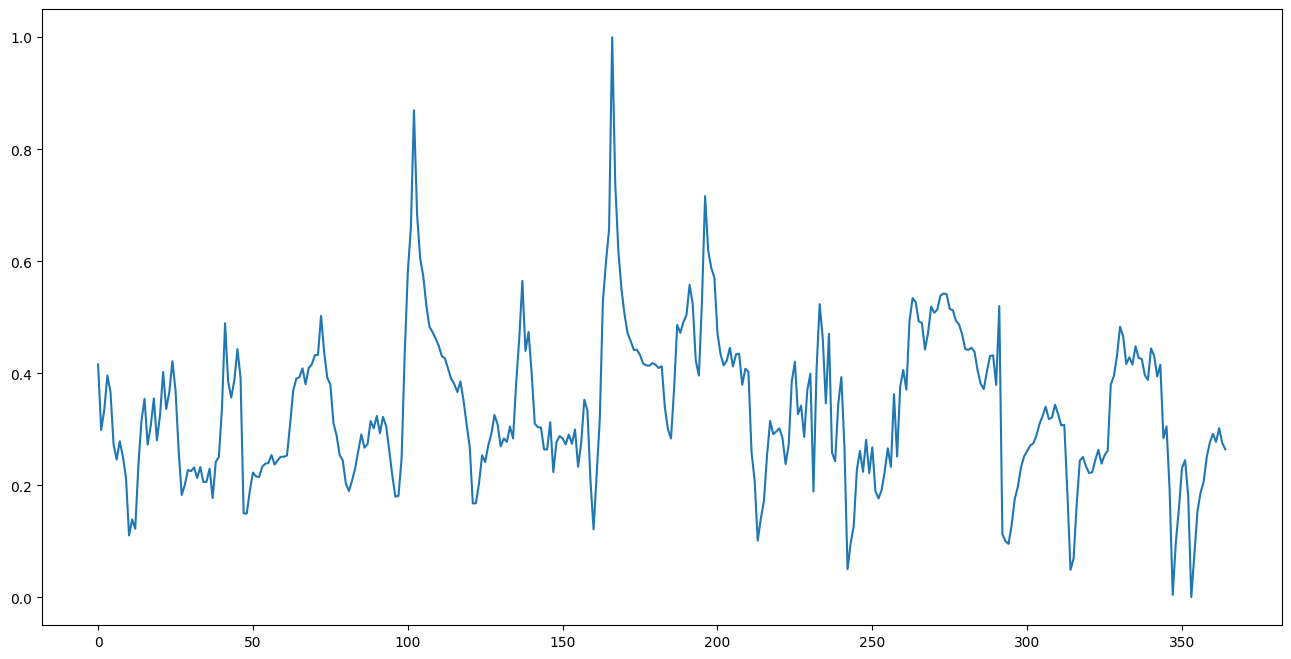

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(y_test)
plt.show()

In [ ]:
# LSTM model

lstm = Sequential()
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(forecasters.shape[1], 1)))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50, return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.3))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 0.0758 - mean_absolute_error: 0.2305 - val_loss: 0.0153 - val_mean_absolute_error: 0.0887
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0178 - mean_absolute_error: 0.1049 - val_loss: 0.0159 - val_mean_absolute_error: 0.0929
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0149 - mean_absolute_error: 0.0942 - val_loss: 0.0152 - val_mean_absolute_error: 0.0900
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0146 - mean_absolute_error: 0.0959 - val_loss: 0.0150 - val_mean_absolute_error: 0.0891
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0966 - val_loss: 0.0164 - val_mean_absolute_error: 0.0965
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0153 - mean_absolute_error: 0.0946 - val_loss: 0.0173 - val_mean_absolute_error: 0.1005
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0153 - mean_absolute_error: 0.0934 -

In [ ]:
test_predictions = lstm.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step


In [ ]:
# Transforming test values ​​back to original values
y_orig_test = scaler.inverse_transform(y_test.reshape(-1, 1))

#escalonando valores de teste
ytest_real_lstm = scaler_real_value.inverse_transform(ytest_real_lstm.reshape(-1, 1))

In [ ]:
test_predictions = test_predictions.ravel()
y_orig_test = y_orig_test.ravel()
ytest_real_lstm = ytest_real_lstm.ravel()

In [ ]:
# Getting the high, low and close values ​​from the test set for the CCI
test_size_L = len(y_test)

high_test_L = base['High'].tail(test_size_L)
low_test_L = base['Low'].tail(test_size_L)
close_test_L = base['Close/Last'].tail(test_size_L)

In [ ]:
# Inverse CCI formula
def cci_inverse(cci_values, high, low, close):
    tp = (high + low + close) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_deviation = (tp - sma_tp).abs().rolling(window=20).mean()
    tp_inverted = cci_values * 0.015 * mean_deviation + sma_tp
    return tp_inverted

In [ ]:
# Inverting the values ​​test_predictions and y_orig_teste by the inverse CCI formula
test_predictions_inverted = cci_inverse(test_predictions, high_test_L, low_test_L, close_test_L)
y_orig_test_inverted = cci_inverse(y_orig_test, high_test_L, low_test_L, close_test_L)

# Removing NaN values
test_predictions_inverted = test_predictions_inverted.dropna()
y_orig_test_inverted = y_orig_test_inverted.dropna()

min_length = min(len(ytest_real_lstm), len(test_predictions_inverted))
ytest_real_lstm = ytest_real_lstm[:min_length]
test_predictions_inverted = test_predictions_inverted[:min_length]


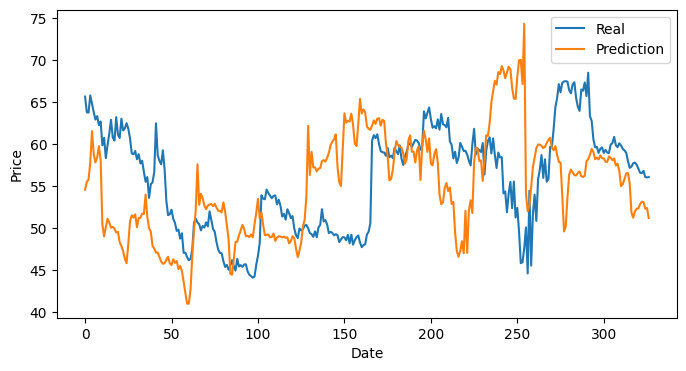

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(ytest_real_lstm)), ytest_real_lstm, label='Real')
plt.plot(range(len(test_predictions_inverted)), test_predictions_inverted, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# R2 Score
r2 = r2_score(ytest_real_lstm, test_predictions_inverted)
print(f'R2 Score: {r2}')

# RMSE
rmse = np.sqrt(np.mean((ytest_real_lstm - test_predictions_inverted) ** 2))
print(f'RMSE: {rmse}')

R2 Score: -0.6605079963467366
RMSE: 7.858748397698795


**ARIMA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from ta.trend import CCIIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import PSARIndicator
from math import sqrt

In [ ]:
base_A = pd.read_csv('Intel 5Y.csv')
base_A.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$23.32,58650460,$22.25,$23.42,$22.045
1,10/07/2024,$22.38,54928670,$22.40,$22.65,$22.0209
2,10/04/2024,$22.59,49966930,$22.70,$22.91,$22.30
3,10/03/2024,$22.26,49565930,$22.14,$22.73,$21.65
4,10/02/2024,$22.39,59033900,$22.67,$23.0668,$22.35


In [ ]:
base_A.dtypes

,0
Date,object
Close/Last,object
Volume,int64
Open,object
High,object
Low,object


In [ ]:
# Removing $
base_A['Close/Last'] = base_A['Close/Last'].str.replace('$', '')
base_A['Open'] = base_A['Open'].str.replace('$', '')
base_A['High'] = base_A['High'].str.replace('$', '')
base_A['Low'] = base_A['Low'].str.replace('$', '')

# Converting str to float
base_A['Close/Last'] = base_A['Close/Last'].astype(float)
base_A['Open'] = base_A['Open'].astype(float)
base_A['High'] = base_A['High'].astype(float)
base_A['Low'] = base_A['Low'].astype(float)

In [ ]:
cci = CCIIndicator(high=base_A['High'], low=base_A['Low'], close=base_A['Close/Last'], window=20, constant=0.015)
base_A['CCI'] = cci.cci()

sma_tp = base_A['High'] + base_A['Low'] + base_A['Close/Last'] / 3
sma_tp = sma_tp.rolling(window=20).mean()
mean_deviation = np.mean(np.abs(base_A['Close/Last'] - sma_tp))

rsi = RSIIndicator(close=base_A['Close/Last'], window=14)
base_A['RSI'] = rsi.rsi()

macd = MACD(close=base_A['Close/Last'], window_slow=26, window_fast=12, window_sign=9)
base_A['MACD'] = macd.macd()
base_A['MACD_Signal'] = macd.macd_signal()
base_A['MACD_Diff'] = macd.macd_diff()

psar = PSARIndicator(high=base_A['High'], low=base_A['Low'], close=base_A['Close/Last'])
base_A['Parabolic_SAR'] = psar.psar()

bollinger = BollingerBands(close=base_A['Close/Last'], window=20, window_dev=2)
base_A['Bollinger_High'] = bollinger.bollinger_hband()
base_A['Bollinger_Low'] = bollinger.bollinger_lband()
base_A['Bollinger_Middle'] = bollinger.bollinger_mavg()
base_A['Bollinger_Width'] = bollinger.bollinger_wband()

base_A.dropna()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,21.41,57028870,21.072,21.440,21.0700,109.236141,54.112274,-0.365474,-0.606827,0.241353,19.455067,21.792245,18.378755,20.08550,16.994799
34,08/20/2024,20.99,84161270,21.210,21.230,20.8200,82.525909,51.262625,-0.290474,-0.543556,0.253082,19.561664,21.823466,18.369534,20.09650,17.186732
35,08/19/2024,21.52,65956300,20.885,21.860,20.8350,124.006703,54.517618,-0.186125,-0.472070,0.285945,19.663997,21.834038,18.363962,20.09900,17.264916
36,08/16/2024,20.87,48582660,20.530,20.895,20.4101,57.383431,50.098507,-0.154100,-0.408476,0.254376,19.762238,21.828382,18.365618,20.09700,17.230254
37,08/15/2024,20.69,84814880,20.320,21.060,20.2300,46.431701,48.916029,-0.141612,-0.355103,0.213491,19.856548,21.886088,18.410912,20.14850,17.247812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,10/15/2019,52.65,18970760,51.930,53.070,51.8300,-68.893127,32.656899,-1.587661,-1.307755,-0.279905,53.235976,60.363386,49.940114,55.15175,18.899260
1254,10/14/2019,51.64,16425530,51.900,51.950,51.4400,-81.645295,28.543524,-1.611303,-1.368465,-0.242838,53.070000,60.025053,49.607447,54.81625,19.004594
1255,10/11/2019,52.09,24167110,52.000,52.790,51.8200,-59.811562,32.615978,-1.575567,-1.409885,-0.165681,51.029100,59.591590,49.422910,54.50725,18.655647
1256,10/10/2019,51.11,14611660,50.410,51.775,50.4000,-83.377075,28.770423,-1.607790,-1.449466,-0.158323,52.790000,59.176915,49.143585,54.16025,18.525264


In [ ]:
# Converting indicator values ​​to numeric values ​​and removing NaN values
base_A = base_A.replace([np.inf, -np.inf], np.nan)
base_A = base_A.dropna()

In [ ]:
base_A.head()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,21.41,57028870,21.072,21.440,21.0700,109.236141,54.112274,-0.365474,-0.606827,0.241353,19.455067,21.792245,18.378755,20.0855,16.994799
34,08/20/2024,20.99,84161270,21.210,21.230,20.8200,82.525909,51.262625,-0.290474,-0.543556,0.253082,19.561664,21.823466,18.369534,20.0965,17.186732
35,08/19/2024,21.52,65956300,20.885,21.860,20.8350,124.006703,54.517618,-0.186125,-0.472070,0.285945,19.663997,21.834038,18.363962,20.0990,17.264916
36,08/16/2024,20.87,48582660,20.530,20.895,20.4101,57.383431,50.098507,-0.154100,-0.408476,0.254376,19.762238,21.828382,18.365618,20.0970,17.230254
37,08/15/2024,20.69,84814880,20.320,21.060,20.2300,46.431701,48.916029,-0.141612,-0.355103,0.213491,19.856548,21.886088,18.410912,20.1485,17.247812


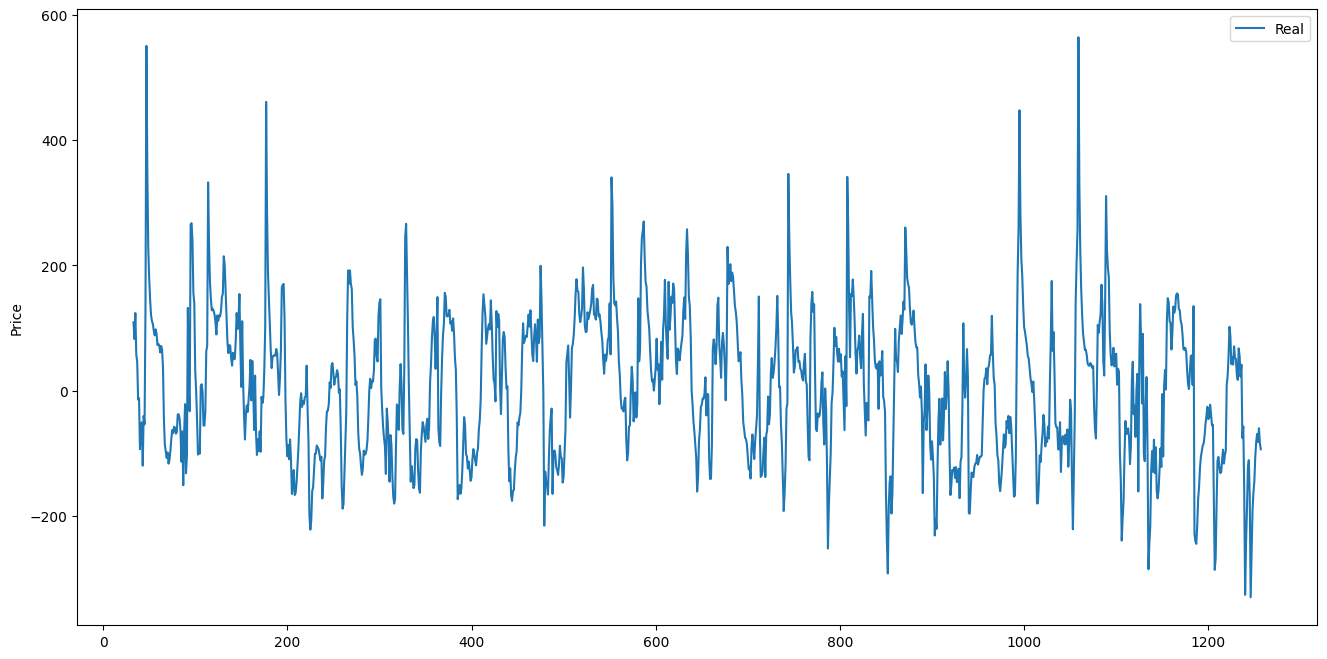

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base_A['CCI'], label='Real')
plt.ylabel('Price')
plt.legend()

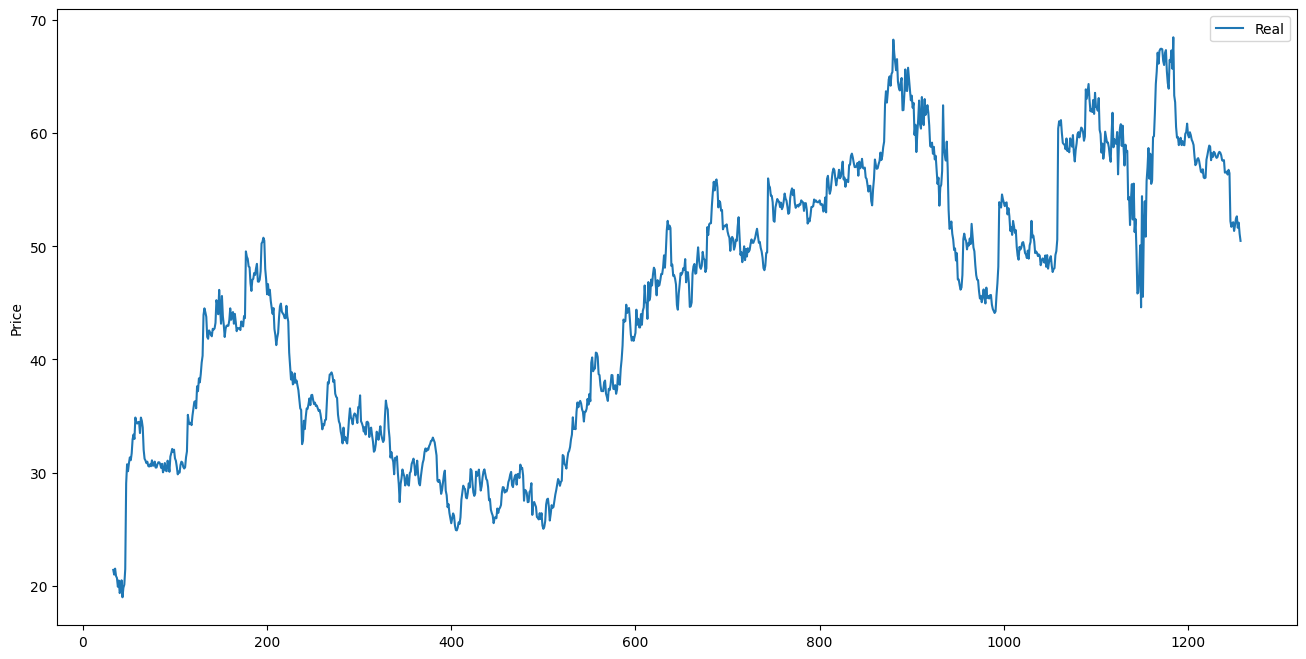

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base_A['Close/Last'], label='Real')
plt.ylabel('Price')
plt.legend()

In [ ]:
X_R = base_A['Close/Last'].values
size_R = int(len(X_R) * 0.70)
train_R, test_R = X_R[0:size_R], X_R[size_R:len(X_R)]
history_R = [x_r for x_r in train_R]
forecasts_R = list()

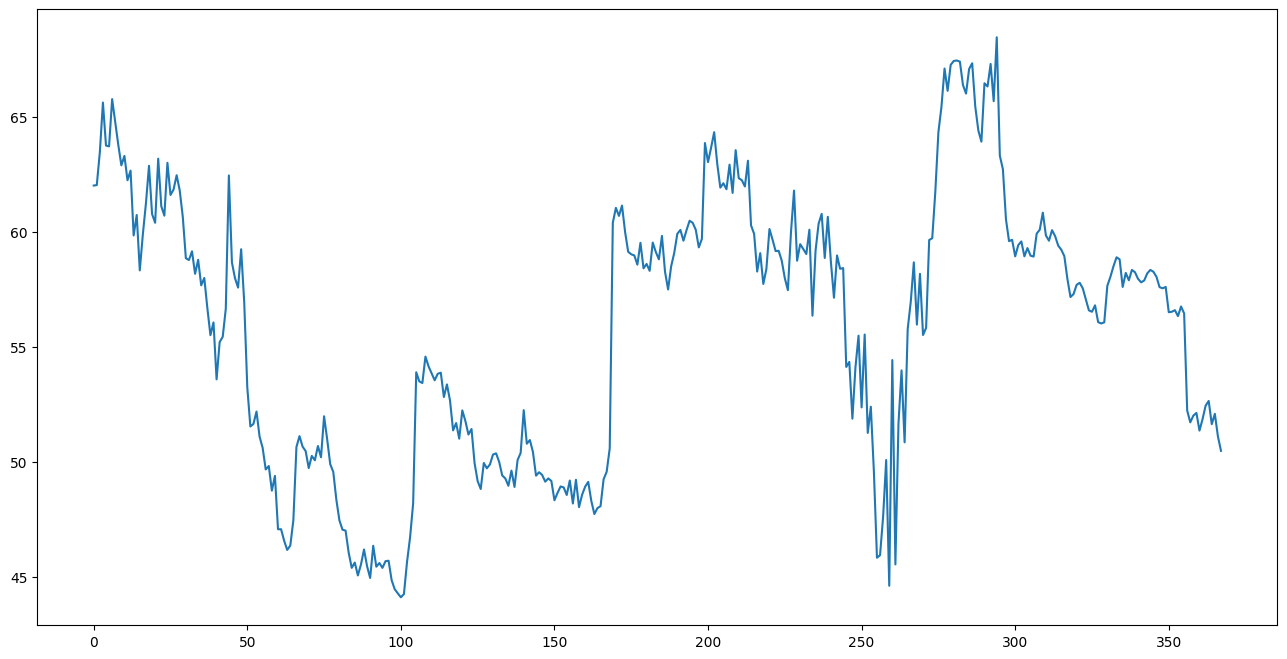

In [ ]:
#Test Grafic
plt.figure(figsize=(16, 8))
plt.plot(test_R)
plt.show()

In [ ]:
# Addfuller for CCI
result = adfuller(base_A['CCI'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -10.187866432525473
p-value: 6.4372155220495845e-18


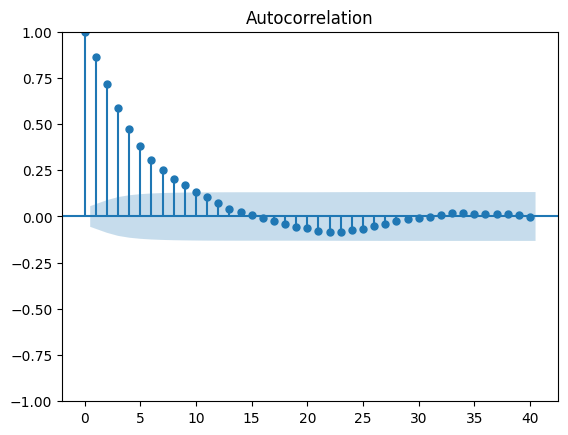

In [ ]:
plot_acf(base_A['CCI'], lags=40)
plt.show()

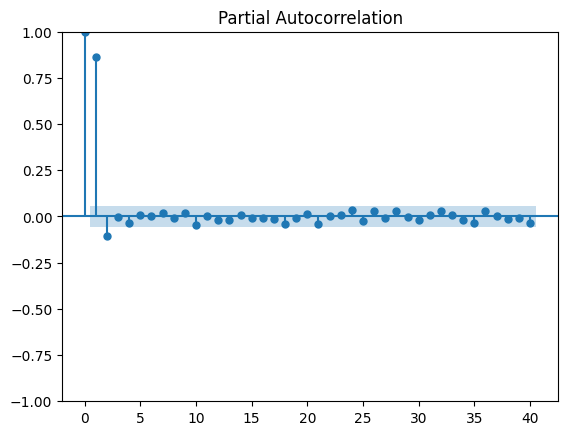

In [ ]:
plot_pacf(base_A['CCI'], lags=40)
plt.show()

In [ ]:
X = base_A['CCI'].values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
forecasts = list()

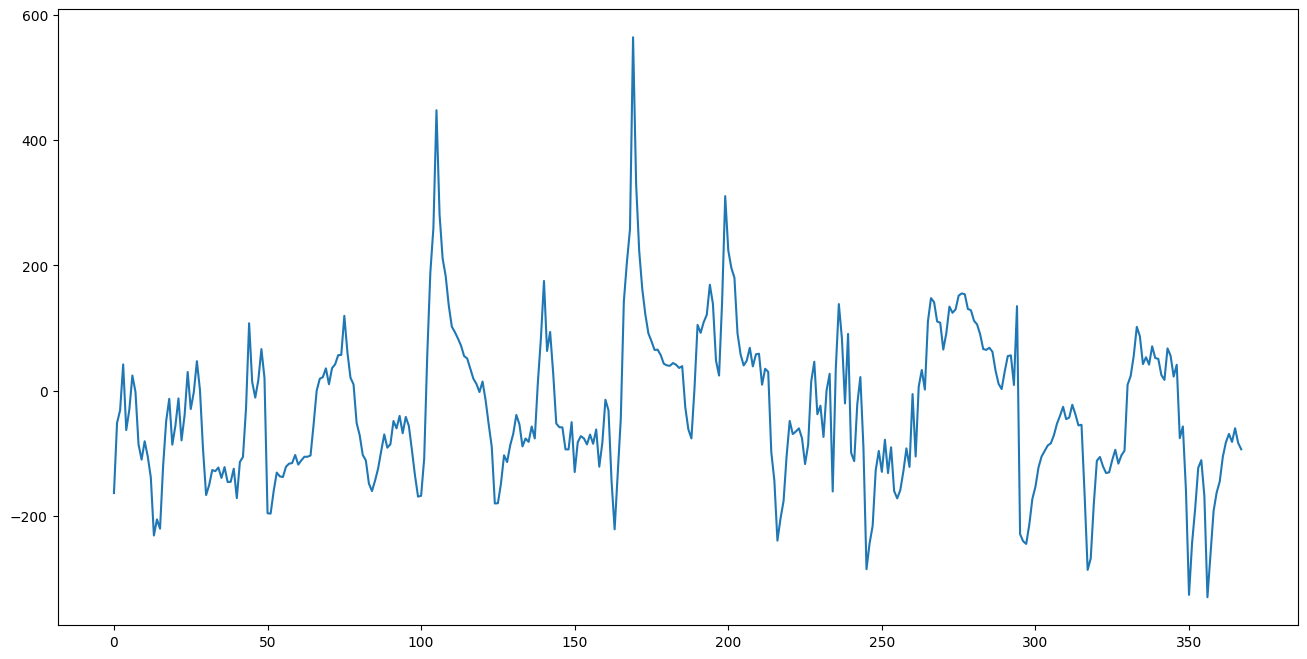

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(test)
plt.show()

In [ ]:
# ARIMA
for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    forecasts.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Expected={yhat}, Observed={obs}')

Expected=-29.05919668436271, Observed=-163.29687792649935
Expected=-149.62679405375064, Observed=-51.461115590645484
Expected=-27.940596708290727, Observed=-31.02940916362146
Expected=-20.76004223289239, Observed=42.07834149656652
Expected=46.79481075131874, Observed=-62.70306205129896
Expected=-61.023708193269705, Observed=-30.345597671294897
Expected=-18.971190005293934, Observed=24.292443830439836
Expected=29.56087372079519, Observed=-1.6689110442544133
Expected=-1.0166551282003695, Observed=-85.62271124125961
Expected=-78.07721571992298, Observed=-109.95588915171166
Expected=-92.26457416376516, Observed=-80.57418246954617
Expected=-61.66384761215384, Observed=-104.88841651063595
Expected=-88.05735625824552, Observed=-138.51487525691132
Expected=-117.5575216596121, Observed=-231.02673560144123
Expected=-202.51648225439757, Observed=-205.38861886550458
Expected=-168.09309347418233, Observed=-220.16170449314146
Expected=-185.292465460979, Observed=-120.33506876630175
Expected=-88.2000

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=61.602690533282626, Observed=55.32288900470898
Expected=46.932481223567066, Observed=51.544816052731164
Expected=45.27366796086964, Observed=35.22255916901956
Expected=29.90588510880685, Observed=19.382075841868236
Expected=16.515651659887638, Observed=10.95680894261974
Expected=10.25819949550664, Observed=-2.070830406632264
Expected=-1.3594147364117681, Observed=14.707899198385151
Expected=16.481231298480505, Observed=-15.242802316475432
Expected=-14.58144302479092, Observed=-53.60273111341148
Expected=-48.18421738868013, Observed=-89.58861832204704
Expected=-78.49974971660632, Observed=-179.9356001227776
Expected=-162.04153070193672, Observed=-179.50244662222897
Expected=-150.6750090227942, Observed=-147.91543708523
Expected=-120.03396501072795, Observed=-103.03659711735773
Expected=-80.22274277672525, Observed=-113.77586717345628
Expected=-96.23987820071183, Observed=-87.0691986241516
Expected=-68.96975442456947, Observed=-68.52583112960026
Expected=-54.211287027034345, Obs

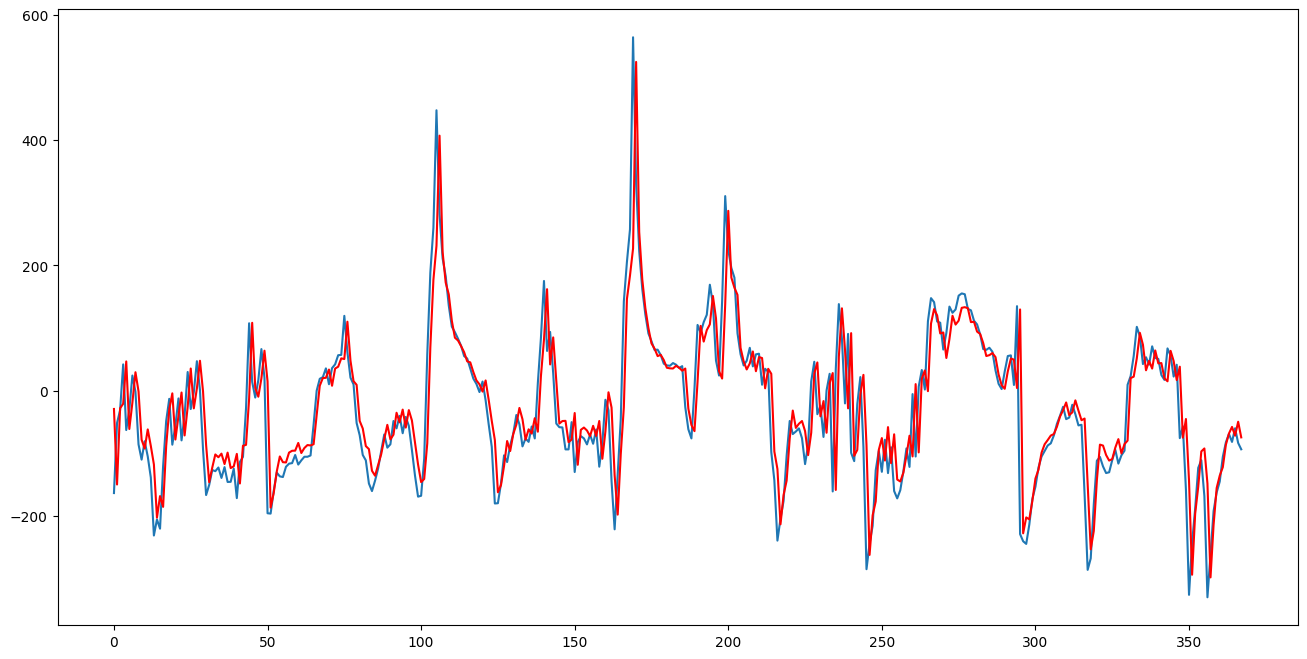

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(test)
plt.plot(forecasts, color='red')
plt.show()

In [ ]:
# Ensuring that data is one-dimensional
test = test.ravel()
forecasts = np.array(forecasts).ravel()

In [ ]:
# Getting the high, low, and close values ​​from the test set for the CCI
test_size_A = len(test)

high_test_A = base_A['High'].tail(test_size_A)
low_test_A = base_A['Low'].tail(test_size_A)
close_test_A = base_A['Close/Last'].tail(test_size_A)

In [ ]:
print(test.shape)
print(forecasts.shape)

(368,)
(368,)


In [ ]:
# Inverse CCI formula
def cci_inverse_A(cci_values_A, high_test_A, low_test_A, close_test_A):
    tp = (high_test_A + low_test_A + close_test_A) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_deviation = (tp - sma_tp).abs().rolling(window=20).mean()
    tp_inverted = cci_values_A * 0.015 * mean_deviation + sma_tp
    return tp_inverted

In [ ]:
test_inverted = cci_inverse_A(test, high_test_A, low_test_A, close_test_A)
forecasts_inverted = cci_inverse_A(forecasts, high_test_A, low_test_A, close_test_A)

In [ ]:
test_inverted = test_inverted.dropna()
forecasts_inverted = pd.Series(forecasts_inverted).dropna()

In [ ]:
min_length_R = min(len(test_R), len(forecasts_inverted))
test_R = test_R[:min_length_R]
forecasts_inverted = forecasts_inverted[:min_length_R]

In [ ]:
# RMSE
rmse = sqrt(mean_squared_error(test_R, forecasts_inverted))
print(f'RMSE: {rmse}')

# R2 Score
r2 = r2_score(test_R, forecasts_inverted)
print(f'R2 Score: {r2}')

RMSE: 7.9642538139281704
R2 Score: -0.7019116759148651


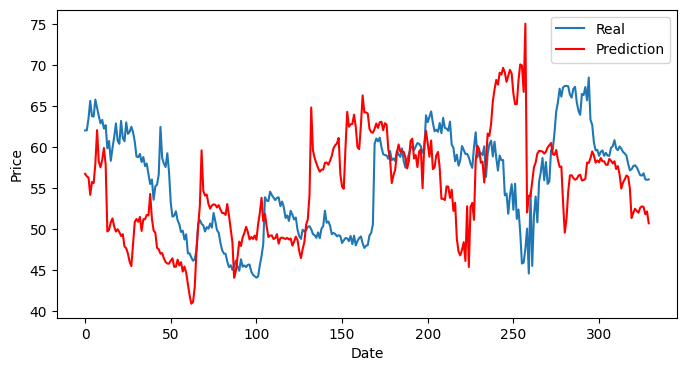

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(test_R)), test_R, label='Real')
plt.plot(range(len(forecasts_inverted)), forecasts_inverted, label='Prediction', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()